In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as mp
df = pd.read_csv('BankData.csv')
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [3]:
df['step'].isna().sum()

0

In [4]:
df['age'].isna().sum()

0

In [5]:
df['gender'].isna().sum()

0

In [6]:
df['zipcodeOri'].isna().sum()

0

In [7]:
df['zipMerchant'].isna().sum()

0

In [8]:
df['category'].isna().sum()

0

In [9]:
df['amount'].isna().sum()

0

In [10]:
df['fraud'].isna().sum()

0

In [11]:
df['amount'].isna().sum()

0

In [12]:
df['step'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179], d

In [13]:
df['customer'].nunique()

4112

In [14]:
df['merchant'].nunique()

50

In [15]:
df['merchant'].unique()

array(["'M348934600'", "'M1823072687'", "'M50039827'", "'M1888755466'",
       "'M1053599405'", "'M85975013'", "'M480139044'", "'M692898500'",
       "'M348875670'", "'M151143676'", "'M840466850'", "'M1741626453'",
       "'M1535107174'", "'M855959430'", "'M349281107'", "'M209847108'",
       "'M2122776122'", "'M1873032707'", "'M2011752106'", "'M857378720'",
       "'M1198415165'", "'M1748431652'", "'M980657600'", "'M1352454843'",
       "'M117188757'", "'M547558035'", "'M17379832'", "'M1649169323'",
       "'M1946091778'", "'M97925176'", "'M923029380'", "'M1353266412'",
       "'M1842530320'", "'M677738360'", "'M1313686961'", "'M732195782'",
       "'M1600850729'", "'M1872033263'", "'M3697346'", "'M495352832'",
       "'M1400236507'", "'M1294758098'", "'M1913465890'", "'M45060432'",
       "'M78078399'", "'M2080407379'", "'M1788569036'", "'M1416436880'",
       "'M933210764'", "'M1726401631'"], dtype=object)

In [16]:
df['gender'].unique()

array(["'M'", "'F'", "'E'", "'U'"], dtype=object)

In [17]:
df.dtypes

step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object

In [18]:
df['gender'][df['gender'] == "'U'"].count()

515

In [19]:
df['age'][df['age'] == "'U'"].count()

1178

In [20]:
## I believe we should do a knn imputation to impute U values. after this we check imbalance of dataset and use smote to balance
##if necessary
## once this is done we need to change all object datatypes to int float or category

In [21]:
(df['gender'] == 'F').count()

594643

In [22]:
df.dtypes

step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object

In [23]:
# My first step will be to impute the missing values for gender
from sklearn.impute import KNNImputer
dfimpute = df.drop(columns="gender")
dfimpute.head()


,step,customer,age,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','28007','M348934600','28007','es_transportation',35.72,0


In [24]:
dfimpute['age'].unique()

array(["'4'", "'2'", "'3'", "'5'", "'1'", "'6'", "'U'", "'0'"],
      dtype=object)

In [25]:
dfimpute['age'][dfimpute['age'] == "'U'"].count()

1178

In [26]:
dfimpute['age'].replace("'U'", np.nan, inplace=True)

In [27]:
dict = {"'6'": 6, "'5'": 5, "'4'": 4, "'3'": 3, "'2'": 2, "'1'": 1, "'0'": 0}
dfimpute.replace({'age': dict}, inplace=True)
dfimpute['age'].unique()

array([ 4.,  2.,  3.,  5.,  1.,  6., nan,  0.])

In [28]:
dfimpute['age'] = dfimpute['age'].astype('float64')

In [29]:
dfimpute.dtypes


step             int64
customer        object
age            float64
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object

In [30]:
dfimpute['step']=dfimpute['step'].astype('float64')
dfimpute['customer'], custuniques = dfimpute['customer'].factorize()
dfimpute['customer'] = dfimpute['customer'].astype('float64')
dfimpute['zipcodeOri'], zipOriUniques = dfimpute['zipcodeOri'].factorize()
dfimpute['zipcodeOri'] = dfimpute['zipcodeOri'].astype('float64')
dfimpute['merchant'], merchantUniques = dfimpute['merchant'].factorize()
dfimpute['merchant'] = dfimpute['merchant'].astype('float64')
dfimpute['zipMerchant'], zipMerchUniques = dfimpute['zipMerchant'].factorize()
dfimpute['zipMerchant'] = dfimpute['zipMerchant'].astype('float64')
dfimpute['category'], catsUniques = dfimpute['category'].factorize()
dfimpute['category'] = dfimpute['category'].astype('float64')
dfimpute.drop(columns="fraud", inplace=True)

In [31]:
dfimpute.dtypes

step           float64
customer       float64
age            float64
zipcodeOri     float64
merchant       float64
zipMerchant    float64
category       float64
amount         float64
dtype: object

In [32]:
impute_knn=KNNImputer(n_neighbors=5)
newnumpyimpute = impute_knn.fit_transform(dfimpute)
newdfimpute = pd.DataFrame(newnumpyimpute, columns = dfimpute.columns)
newdfimpute.isna().sum()

step           0
customer       0
age            0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
dtype: int64

In [33]:
newdfimpute['gender'] = df['gender']
df['gender'].head()

0    'M'
1    'M'
2    'F'
3    'M'
4    'M'
Name: gender, dtype: object

In [34]:
newdf = pd.read_csv('BankData.csv')
newdf.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [35]:
newdfimpute['gender'] = newdf['gender']
newdfimpute['gender'].unique()

array(["'M'", "'F'", "'E'", "'U'"], dtype=object)

In [36]:
newdfimpute['gender'].replace("'U'", np.nan, inplace=True)
newdfimpute['gender'], gendersunique = newdfimpute['gender'].factorize()
newdfimpute['gender'] = newdfimpute['gender'].astype('float64')
second_knn_imputer = KNNImputer(n_neighbors=5)
newnumpyimpute2 = second_knn_imputer.fit_transform(newdfimpute)
newdfimpute2 = pd.DataFrame(newnumpyimpute2, columns=newdfimpute.columns)
newdfimpute2.isna().sum()

step           0
customer       0
age            0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
gender         0
dtype: int64

In [37]:
df['gender'] = newdfimpute2['gender']
df['age'] = newdfimpute2['age']

(array([2.45200e+03, 5.81310e+04, 2.00000e+00, 1.87367e+05, 1.59000e+02,
        1.47605e+05, 1.09429e+05, 8.00000e+01, 6.26440e+04, 2.67740e+04]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

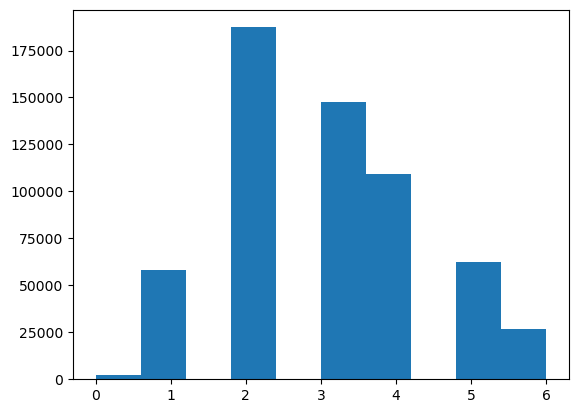

In [39]:
mp.hist(df['age'])

(array([   515.,      0.,      0., 268385.,      0.,      0., 324565.,
             0.,      0.,   1178.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <BarContainer object of 10 artists>)

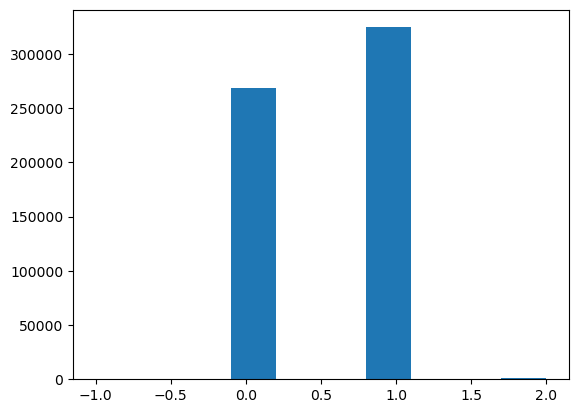

In [40]:
mp.hist(df['gender'])

(array([6.368e+03, 4.400e+02, 1.120e+02, 8.700e+01, 7.200e+01, 6.200e+01,
        3.400e+01, 1.600e+01, 6.000e+00, 3.000e+00]),
 array([3.000000e-02, 8.330230e+02, 1.666016e+03, 2.499009e+03,
        3.332002e+03, 4.164995e+03, 4.997988e+03, 5.830981e+03,
        6.663974e+03, 7.496967e+03, 8.329960e+03]),
 <BarContainer object of 10 artists>)

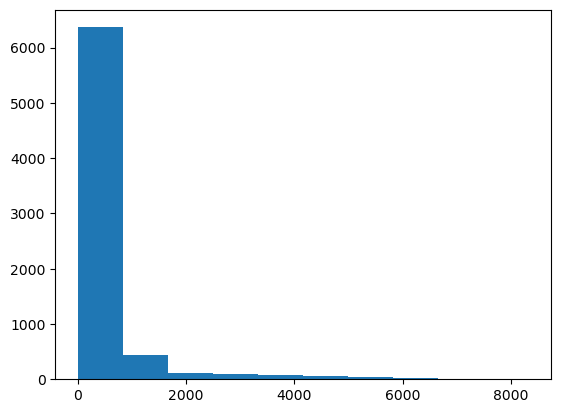

In [55]:
mp.hist(df['amount'][df['fraud'] == 1])

In [53]:
dfmytest = df.loc[(df['amount'] < 101) & (df['fraud'] == 1)]
dfmytest.count()

step           1153
customer       1153
age            1153
gender         1153
zipcodeOri     1153
merchant       1153
zipMerchant    1153
category       1153
amount         1153
fraud          1153
dtype: int64

In [54]:
dfmytest2 = df.loc[(df['fraud'] == 1)]
dfmytest2.count()

step           7200
customer       7200
age            7200
gender         7200
zipcodeOri     7200
merchant       7200
zipMerchant    7200
category       7200
amount         7200
fraud          7200
dtype: int64